## Observations and Insights 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "/content/drive/MyDrive/Colab Notebooks/Joel/03 MatplotlibHW/Mouse_metadata.csv"
study_results_path = "/content/drive/MyDrive/Colab Notebooks/Joel/03 MatplotlibHW/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combineddata = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combineddata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [33]:
# Checking the number of mice.
len(pd.unique(combineddata["Mouse ID"])) 

249

In [35]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combineddata[combineddata.duplicated(subset=["Mouse ID","Timepoint"])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [36]:
# Optional: Get all the data for the duplicate mouse ID. 
combineddata.loc[combineddata["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [42]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaneddata = combineddata.drop(combineddata.loc[combineddata["Mouse ID"] == "g989"].index)

In [43]:
# Checking the number of mice in the clean DataFrame.
len(pd.unique(cleaneddata["Mouse ID"])) 

248

## Summary Statistics

In [67]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

## Select the columns of interest for the task 
data = cleaneddata[["Drug Regimen","Tumor Volume (mm3)"]]

## Group by regimen and calculate mean
meanperregimen = data.groupby("Drug Regimen").mean()

## Group by regimen and calculate median
medianperregimen = data.groupby("Drug Regimen").median()

## Group by regimen and calculate variance
varperregimen = data.groupby("Drug Regimen").var()

## Group by regimen and standard deviation
stdperregimen = data.groupby("Drug Regimen").std()

## Group by regimen and calculate SEM
semperregimen = data.groupby("Drug Regimen").sem()

# Assemble the resulting series into a single summary dataframe.
summarydf = pd.concat([meanperregimen,medianperregimen,varperregimen,stdperregimen,semperregimen], axis=1)

## Establish labels for the columns
summarydf.columns=["Mean","Median","Variance","Standard Deviation","SEM"]

## Display
summarydf

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [79]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
## This task seems to be repeated or might be just a duplicated section name

# Using the aggregation method, produce the same summary statistics in a single line

## Creating a one line dataframe along with labels for its columns
onelinesummary = pd.DataFrame([[cleaneddata["Tumor Volume (mm3)"].mean(),
                               cleaneddata["Tumor Volume (mm3)"].median(),
                               cleaneddata["Tumor Volume (mm3)"].var(),
                               cleaneddata["Tumor Volume (mm3)"].std(),
                               cleaneddata["Tumor Volume (mm3)"].sem()]],
                              columns=["Mean","Median","Variance","Standard Deviation","SEM"])   
## Display
onelinesummary

,Mean,Median,Variance,Standard Deviation,SEM
0,50.435293,48.933454,79.462907,8.914197,0.205591


## Bar and Pie Charts

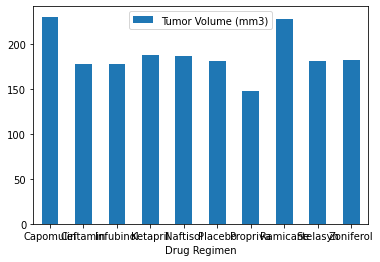

In [87]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

## Select the columns of interest for the task 
data = cleaneddata[["Drug Regimen","Tumor Volume (mm3)"]]

## Group by regimen and count
amountperregimen = data.groupby("Drug Regimen").count()

## Generate and display bar plot
amountperregimen.plot.bar(rot=0)

Text(0.5, 0, 'Drug Regimen')

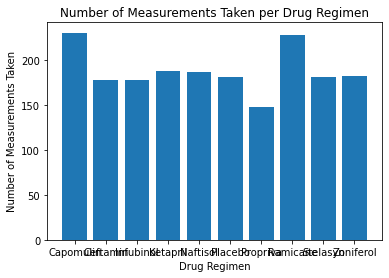

In [207]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

## Regenerate amountperregimen
amountperregimen = data.groupby("Drug Regimen").count()

## Turn Index Column into a Regular Column in amountperregimen
amountperregimen.reset_index(inplace=True)

## Generate and display bar plot
plt.bar(amountperregimen["Drug Regimen"],amountperregimen["Tumor Volume (mm3)"])
plt.title("Number of Measurements Taken per Drug Regimen")
plt.ylabel("Number of Measurements Taken")
plt.xlabel("Drug Regimen")

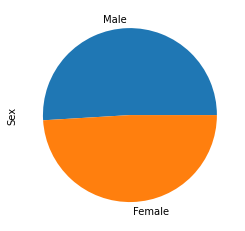

In [102]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

## Calculate distribution
distribution = cleaneddata["Sex"].value_counts(normalize=True)

## Generate and display pie plot
distribution.plot.pie()

Text(0, 0.5, 'Sex')

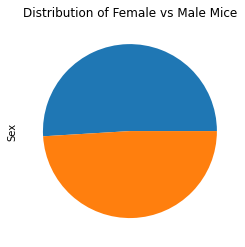

In [209]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Generate and display pie plot
plt.pie(distribution)
plt.title("Distribution of Female vs Male Mice")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [115]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
## Deleting all rows with the same Mouse ID only leaving the last row which is also the greatest timepoint
cleaneddata2 = cleaneddata.drop_duplicates(subset=["Mouse ID"], keep="last")

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
## Not neccesary with the previous approach

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [145]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
## Not neccesary with the approach taken

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
CapomulinData = cleaneddata2.drop(cleaneddata2.loc[cleaneddata2["Drug Regimen"] != "Capomulin"].index)
RamicaneData = cleaneddata2.drop(cleaneddata2.loc[cleaneddata2["Drug Regimen"] != "Ramicane"].index)
InfubinolData = cleaneddata2.drop(cleaneddata2.loc[cleaneddata2["Drug Regimen"] != "Infubinol"].index)
CeftaminData = cleaneddata2.drop(cleaneddata2.loc[cleaneddata2["Drug Regimen"] != "Ceftamin"].index)  
    
    # Determine outliers using upper and lower bounds

## Upper and Lower Bounds for Capomulin ...
q1 = CapomulinData["Tumor Volume (mm3)"].quantile(0.25)
q3 = CapomulinData["Tumor Volume (mm3)"].quantile(0.75)
iqr = q3 - q1
ubound = q3 + 1.5 * iqr
lbound = q1 - 1.5 * iqr

## Print outliers for Capomulin ...
print(" Outliers for Capomulin ...")
outliers = CapomulinData.loc[CapomulinData["Tumor Volume (mm3)"] > ubound]
if not outliers.empty:
  print(outliers)
outliers = CapomulinData.loc[CapomulinData["Tumor Volume (mm3)"] < lbound]
if not outliers.empty:
  print(outliers)

## Upper and Lower Bounds for Ramicane ...
q1 = RamicaneData["Tumor Volume (mm3)"].quantile(0.25)
q3 = RamicaneData["Tumor Volume (mm3)"].quantile(0.75)
iqr = q3 - q1
ubound = q3 + 1.5 * iqr
lbound = q1 - 1.5 * iqr

## Print outliers for Ramicane ...
print("\n Outliers for Ramicane ...")
outliers = RamicaneData.loc[RamicaneData["Tumor Volume (mm3)"] > ubound]
if not outliers.empty:
  print(outliers)
outliers = RamicaneData.loc[RamicaneData["Tumor Volume (mm3)"] < lbound]
if not outliers.empty:
  print(outliers)

## Upper and Lower Bounds for Infubinol ...
q1 = InfubinolData["Tumor Volume (mm3)"].quantile(0.25)
q3 = InfubinolData["Tumor Volume (mm3)"].quantile(0.75)
iqr = q3 - q1
ubound = q3 + 1.5 * iqr
lbound = q1 - 1.5 * iqr

## Print outliers for Infubinol ...
print("\n Outliers for Infubinol ...")
outliers = InfubinolData.loc[InfubinolData["Tumor Volume (mm3)"] > ubound]
if not outliers.empty:
  print(outliers)
outliers = InfubinolData.loc[InfubinolData["Tumor Volume (mm3)"] < lbound]
if not outliers.empty:
  print(outliers)

## Upper and Lower Bounds for Ceftamin ...
q1 = CeftaminData["Tumor Volume (mm3)"].quantile(0.25)
q3 = CeftaminData["Tumor Volume (mm3)"].quantile(0.75)
iqr = q3 - q1
ubound = q3 + 1.5 * iqr
lbound = q1 - 1.5 * iqr

## Print outliers for Ceftamin ...
print("\n Outliers for Ceftamin ...")
outliers = CeftaminData.loc[CeftaminData["Tumor Volume (mm3)"] > ubound]
if not outliers.empty:
  print(outliers)
outliers = CeftaminData.loc[CeftaminData["Tumor Volume (mm3)"] < lbound]
if not outliers.empty:
  print(outliers)

 Outliers for Capomulin ...

 Outliers for Ramicane ...

 Outliers for Infubinol ...
    Mouse ID Drug Regimen  ... Tumor Volume (mm3)  Metastatic Sites
669     c326    Infubinol  ...          36.321346                 0

[1 rows x 8 columns]

 Outliers for Ceftamin ...


Text(0.5, 0, 'Drug Regimen')

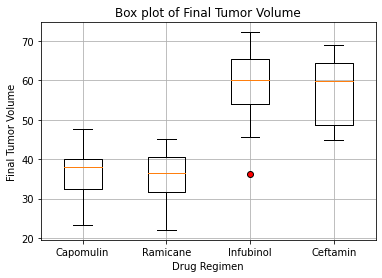

In [205]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest and highlight any potential outliers in the plot by changing their color and style.
plt.boxplot([CapomulinData["Tumor Volume (mm3)"],
             RamicaneData["Tumor Volume (mm3)"],
             InfubinolData["Tumor Volume (mm3)"],
             CeftaminData["Tumor Volume (mm3)"]], 
            labels=treatments, 
            flierprops=dict(marker='o', markerfacecolor='red'))

## Display box plot
plt.grid()
plt.title("Box plot of Final Tumor Volume")
plt.ylabel("Final Tumor Volume")
plt.xlabel("Drug Regimen")

## Line and Scatter Plots

Text(0.5, 0, 'Timepoint')

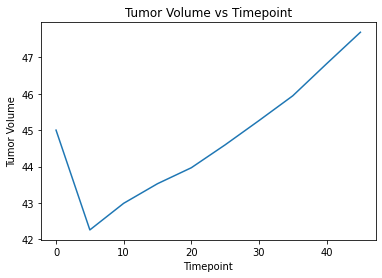

In [203]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

## Filter the data to retrieve only the mice treated with the Capomulin regimen
lineplotdata = cleaneddata.drop(cleaneddata.loc[cleaneddata["Drug Regimen"] != "Capomulin"].index)

## Filter the data to retrieve only Mouse ID i557
lineplotdata = cleaneddata.drop(cleaneddata.loc[cleaneddata["Mouse ID"] != "i557"].index)

## Generate and display line plot
plt.plot(lineplotdata["Timepoint"], lineplotdata["Tumor Volume (mm3)"])
plt.title("Tumor Volume vs Timepoint")
plt.ylabel("Tumor Volume")
plt.xlabel("Timepoint")

Text(0.5, 0, 'Weight')

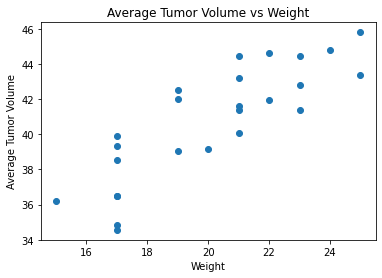

In [204]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

## Filter the data to retrieve only the mice treated with the Capomulin regimen
scatterplotdata = cleaneddata.drop(cleaneddata.loc[cleaneddata["Drug Regimen"] != "Capomulin"].index)

## Calculate average tumor volume per mouse
tumordata = scatterplotdata.groupby("Mouse ID", as_index=False)["Tumor Volume (mm3)"].mean()

## Retrieve mouse weight data and drop duplicates
mouseweight = scatterplotdata[["Mouse ID","Weight (g)"]]
mouseweight = mouseweight.drop_duplicates(inplace=False)

## Add mouse weight to the average tumor volume per mouse
scatterplotdata = pd.merge(tumordata, mouseweight, on="Mouse ID", how="outer")

## Generate and display scatter plot
plt.scatter(scatterplotdata["Weight (g)"], scatterplotdata["Tumor Volume (mm3)"])
plt.title("Average Tumor Volume vs Weight")
plt.ylabel("Average Tumor Volume")
plt.xlabel("Weight")

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

## Calculating and printing the correlation coefficient
print("Correlation Coefficient ...")
print(scatterplotdata[["Weight (g)", "Tumor Volume (mm3)"]].corr())

## Calculating and printing the linear regression model
print("")
print("Linear Regression Model ...")
print(st.linregress(scatterplotdata[["Weight (g)", "Tumor Volume (mm3)"]]))